For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 
$$ M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
$$

For convenience, let us define 

$$f(\chi) = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}} = \frac{M_{\rm irr}}{M}$$

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

**Tasks**:

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 

2. Plot the resulting pdf of $M_{\rm irr}$. First try an histogram with one the rules of thumb we've seen above.

*Hint*: You don't know the functional form of the pdf of $M_{\rm irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!



In [20]:

import numpy as np
from matplotlib import pyplot as plt

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import uniform
import scipy.stats
from scipy import optimize

In [21]:
plt.rc('text', usetex=True)  # Abilita l'uso di LaTeX in tutte le stringhe di testo
plt.rc('font', family='serif')
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [22]:
from astroML import stats as astroMLstats
from sklearn.neighbors import KernelDensity

In [23]:
def M_irriducible (m, chi):
    return m * ((1+(1-chi**2)**0.5)/2)**0.5

In [24]:
mu = 1
sigma = 0.02
N = 1000
mass = np.random.normal (mu, sigma, size = N)

In [25]:
spin = np.random.uniform(0,1, N)
#plt.hist(spin, bins=int(1000**0.5), density=True)

In [26]:
M_irr = M_irriducible(mass, spin)

## Bin with the random method that I've always used

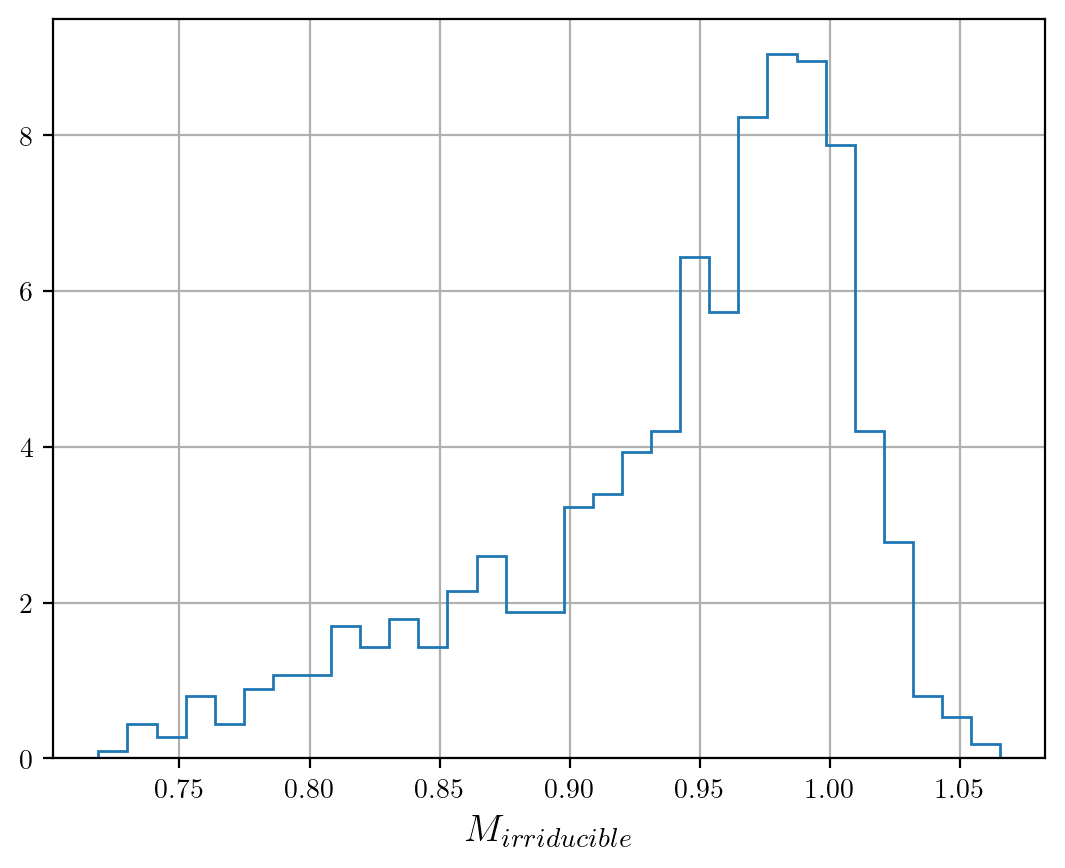

In [27]:
plt.hist(M_irr, bins=int(1000**0.5), density=True,  histtype="step")
plt.xlabel('$M_{irriducible}$', fontsize=14)
plt.grid()
plt.show()

## Bin with the  "Freedman-Diaconis rule":

In [28]:
sigmaG = astroMLstats.sigmaG(M_irr)

In [29]:
binsize = 2.7*sigmaG/(N**(1/3))
print(binsize)
binsG = np.append(np.arange(start=M_irr.min(), stop=M_irr.max(), step=binsize) , M_irr.max()) 

0.016716281658300598


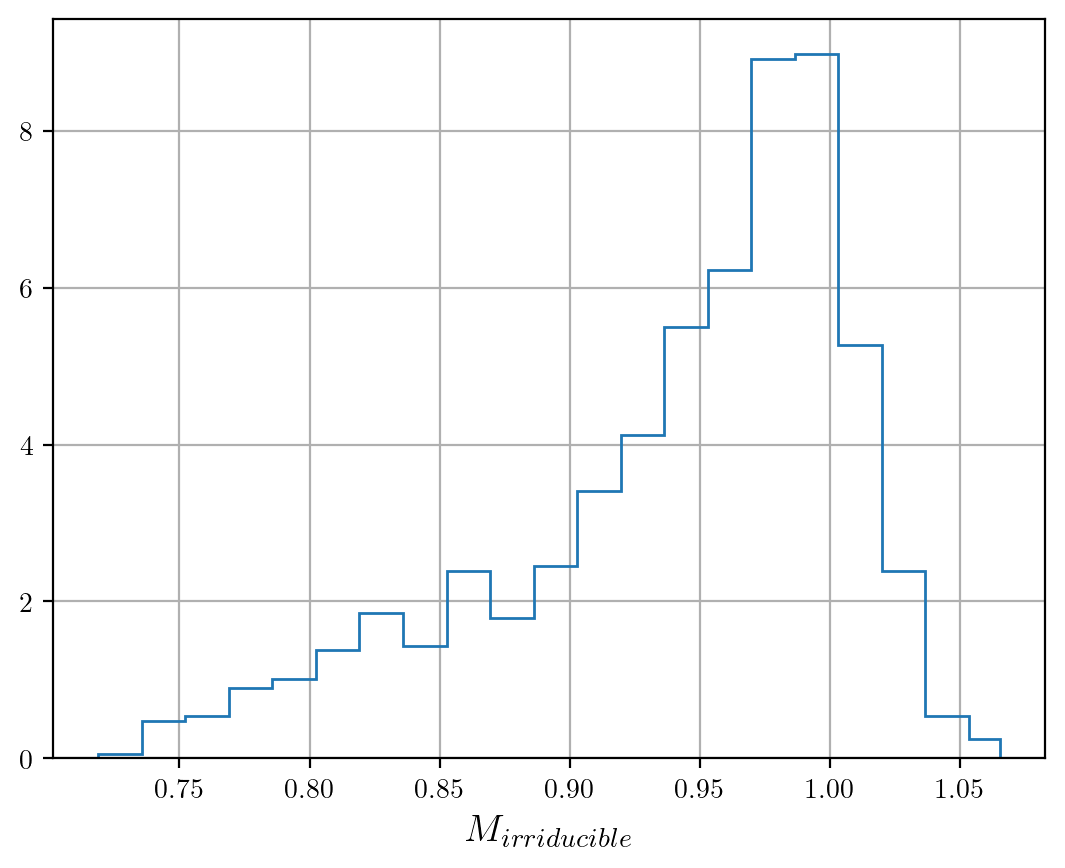

In [30]:
_ = plt.hist(M_irr, bins=binsG, density=True, histtype="step") 
plt.xlabel('$M_{irriducible}$', fontsize=14)
plt.grid()
plt.show()

## Bin with the  "Scott's rule":

In [31]:
sigmaS = np.std(M_irr)

In [32]:
binsize = 3.5*sigmaS/(N**(1/3))
print(binsize)
binsS = np.append(np.arange(start=M_irr.min(), stop=M_irr.max(), step=binsize) , M_irr.max()) 

0.023498230098701393


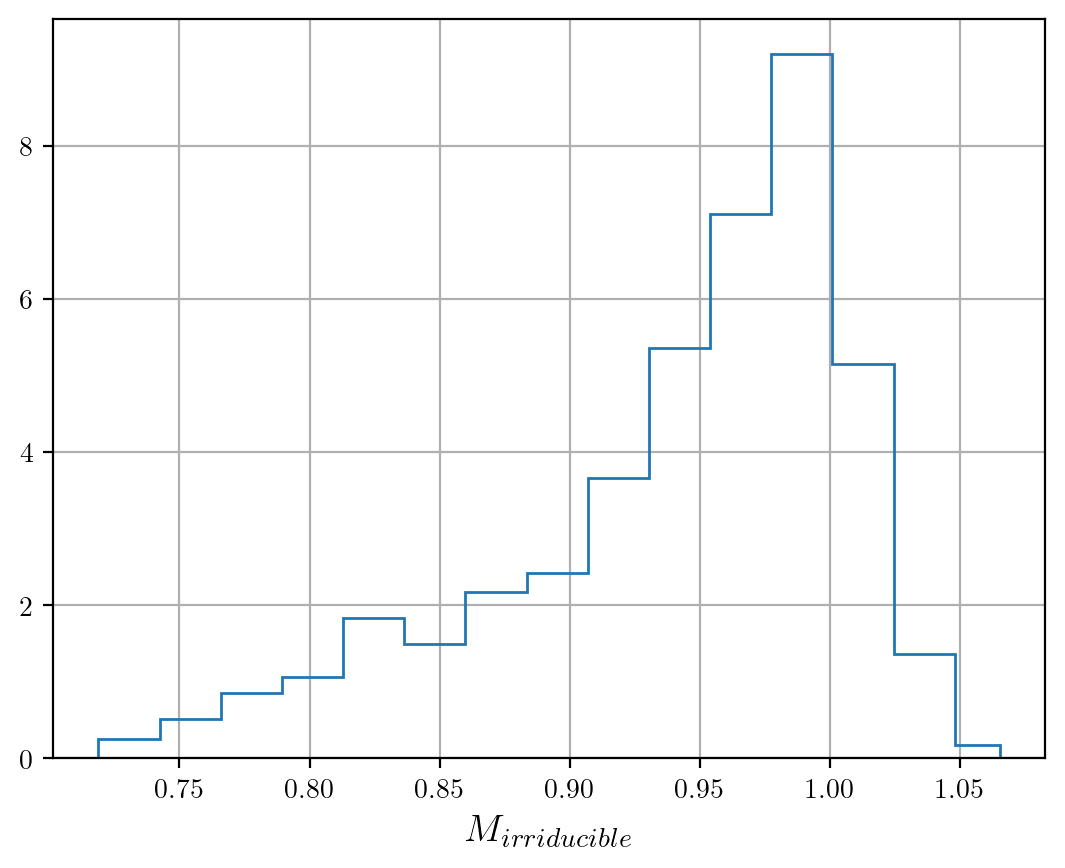

In [33]:
_ = plt.hist(M_irr, bins=binsS, density=True, histtype="step")
plt.xlabel('$M_{irriducible}$', fontsize=14)
plt.grid()
plt.show()

3. Using the same samples, plot the distribution of $M_{\rm irr}$ using a KDE.


## KDE 

In [34]:
xgrid = np.linspace(M_irr.min(),M_irr.max(),1000)

In [35]:
def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

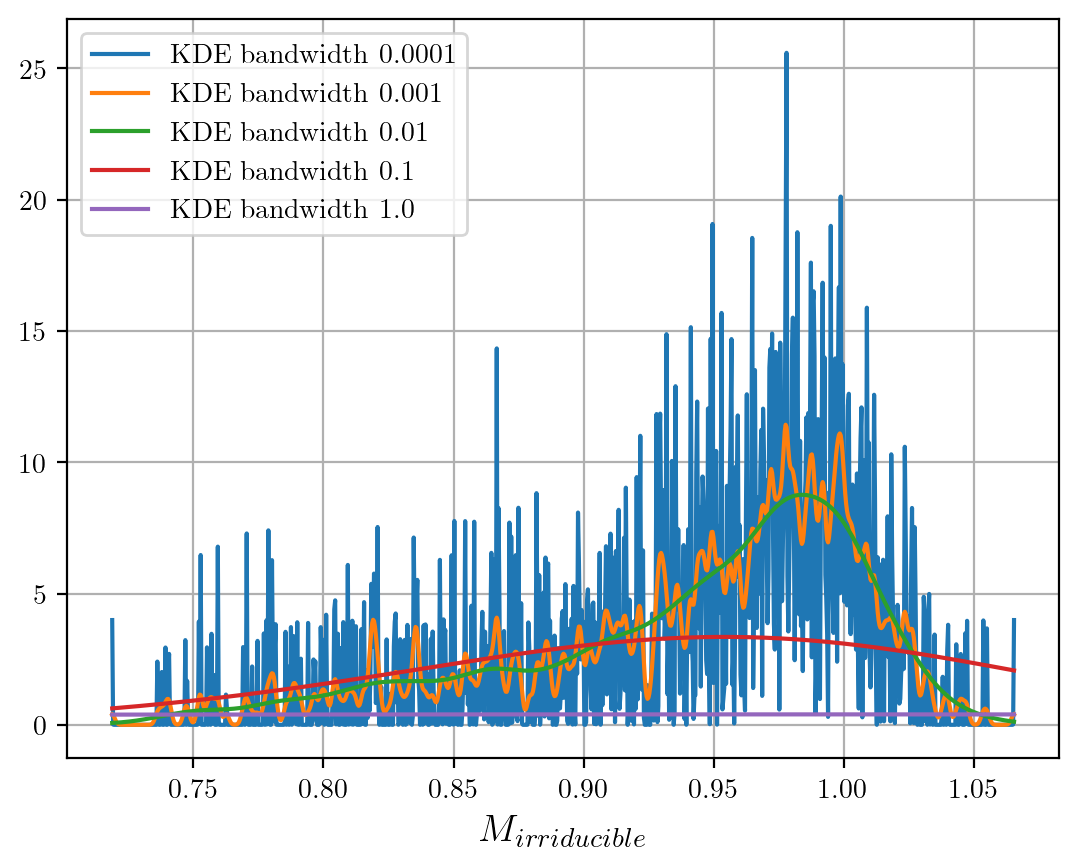

In [36]:
widths = np.logspace(-4, 0, 5)

for w in widths:
    PDFtophat = kde_sklearn(M_irr,bandwidth=w,kernel="gaussian")
    plt.plot(xgrid,PDFtophat, label=f'KDE bandwidth {w}')
    plt.xlabel('$M_{irriducible}$', fontsize=14)
    plt.grid()

plt.legend()
plt.show()

4. Compute the KS distance between ${M_{\rm irr}}$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

5. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

## KS tests

In [68]:
sigma = np.logspace(-4, 4, 10)

D_Mf = []
D_MM = []
for s in sigma:
    mass = np.random.normal (mu, s, size = N)
    M_irr = M_irriducible(mass, spin) 
    f = M_irr/mass
    D_Mf.append((scipy.stats.ks_2samp(f, M_irr)))
    D_MM.append((scipy.stats.ks_2samp(mass, M_irr)))

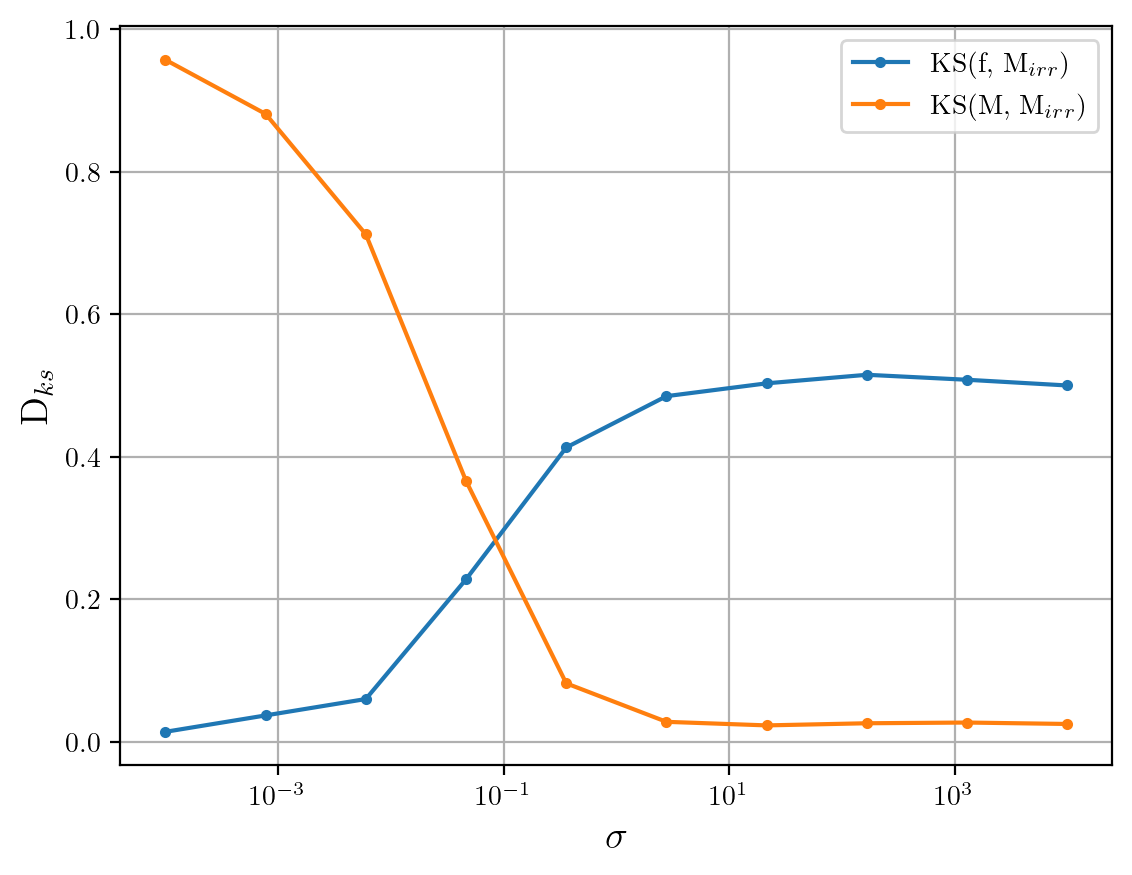

In [72]:
plt.plot(sigma, (np.array(D_Mf))[:,0], marker='.', label='KS(f, M$_{irr}$)')
plt.plot(sigma, (np.array(D_MM))[:,0], marker='.', label='KS(M, M$_{irr}$)')
plt.xlabel('$\sigma$', fontsize=14)
plt.ylabel('D$_{ks}$', fontsize=14)
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()


6. You should find that (i) $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and (ii) $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$.



In [ ]:
#penso tu debba trovare un modo per plottarle una sopra all'altra..


7. Compute the pdfs of $M_{\rm irr}$ from their mathematical definitions, plot them, and check they agree with your KDE.

*Hint (for point 7 above)*: First compute the pdf of $f$, that is just a change of variable. We saw how to do this in a previous lecture. The answer is:
\begin{equation}
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}

*Another hint (still for point 7 above)*: Then compute the pdf of $M_{\rm irr}$, you want to use [this theorem](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables) for the product of two random variables. The answer is only semi-analytic (unless you know how to solve that integral? If so please tell me!)
$$
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,.
$$
This can be easily solved numerically.

*Yet another hint:* If any any time you get lost in the calculation, it helps checking that your pdfs are normalized as they should.

### My sol

compute inverse of f($\chi$):
$$ \chi = \sqrt{1-(2f^2-1)^2} $$

$$ |\frac{d\chi}{df}| = \frac{2(2f^2-1)}{\sqrt{1-f^2}}$$

$$ p(f)=p(\chi)  |\frac{d\chi}{df}| =  |\frac{d\chi}{df}|  $$

(bc  $p(\chi) = 1$)

since $M_{irr}=Mf$ 
$$ p_{M_{irr}} = \int_{-\inf}^{\inf} p_M ( M ) p_f (\frac{M_{irr}}{M}) \frac{1}{|M|} dM $$

### SBAGLIATOOOO

/tmp/ipykernel_2126/3532878896.py:4: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((1 + np.sqrt(1 - x**2)) / 2)


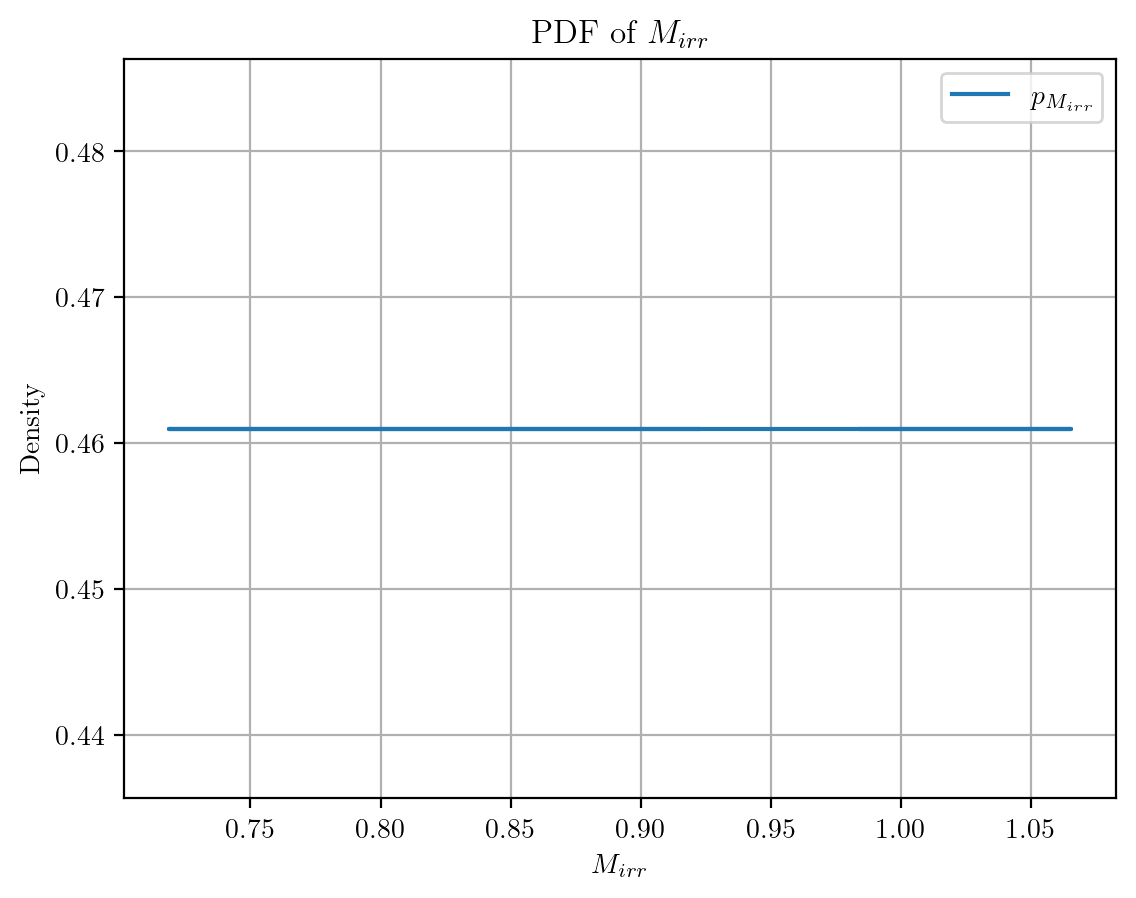

In [64]:
from scipy.integrate import quad

def f(x):
    return np.sqrt((1 + np.sqrt(1 - x**2)) / 2)

def p_f(f):
    if np.abs(f) <= 1:
        return np.sqrt((1 + np.sqrt(1 - f**2)) / 2)
    else:
        return 0

def p_M(M):
    return norm.pdf(M, mu, sigma)

def integrand(M, M_irr):
    f_val = f(M)
    if np.abs(f_val) > 1:  # p_f is defined only for |f| <= 1
        return 0
    return p_M(M) * p_f(f_val) / np.abs(M)

def p_M_irr(M_irr):
    result, _ = quad(lambda M: integrand(M, M_irr), -np.inf, np.inf)
    return result

p_M_irr_values = [p_M_irr(mirr) for mirr in M_irr]

# Visualize the PDF of M_irr
import matplotlib.pyplot as plt
plt.plot(M_irr, p_M_irr_values, label='$p_{M_{irr}}$')
plt.xlabel('$M_{irr}$')
plt.ylabel('Density')
plt.title('PDF of $M_{irr}$')
plt.grid(True)
plt.legend()
plt.show()